In [172]:

# Import Libraries
import pandas as pd
import numpy as np
import os
from dask import dataframe as dd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from dateutil.relativedelta import relativedelta

import icd10

def ConvertDate(string):
    date = pd.to_datetime(string, format='%Y-%m-%d')
    return date

def displayDataFrame(df):
    with pd.option_context('display.max_columns', None) and pd.option_context('display.max_colwidth', None):
        display(df)
    
def SummaryDataFrame(df, ConditionName):
    print('-----------------------------')
    print('\033[1m' + ConditionName.upper() + '\033[0m')
    print('\033[1m Columns: \033[0m')
    print(df.columns)
    print('\033[1m Size of dataset: \033[0m', df.shape)
    displayDataFrame(df.head(2))
    
def BoldFont(string):
    return '\033[1m ' + string + ' \033[0m'


In [6]:

ReadCSV = True

# Import original dataset
FileName = "Endo sinus data 03-11-21_WithDates.xlsx"
Path = r"O:\GIRFT DiRAC\FlavienHardy\3_Readmissions\Data\0.Raw"
FilePath = os.path.join(Path, FileName)

ReadCSV = True
if ReadCSV:
    df_ini = pd.read_excel(FilePath)
    
SummaryDataFrame(df_ini, 'Endoscopic Sinus Surgery')


-----------------------------
ENDOSCOPIC SINUS SURGERY
 Columns: 
Index(['P_Spell_ID', 'Epikey', 'period', 'procedure_group', 'Y761', 'sex',
       'admission_method_code', 'discharge_destination_code', 'EPIstart',
       'EPIend', 'OPERTN01', 'Consult', 'HESID', 'epiorder', 'ProvCode',
       'Provider_Name', 'Sitecode', 'LSOA_2011_Code', 'IMD_score', 'IMDdecile',
       'main_specialty_code', 'treatment_specialty_code', 'spec',
       'age_of_patient', 'diagnosis_group', 'Index_complication', 'Diag01',
       'POD', 'SpellCCdays', 'DominantProcedure_Current',
       'SpellDominantProcedure_Current', 'MORT', 'FinY', 'Read30', 'Read90',
       'Read30_0LOS', 'Read90_0LOS', 'Read30_1a0dOverLOS',
       'Read90_1a0dOverLOS', 'Read30spellid', 'Read90spellid', 'Spell_Los',
       'Admission_date', 'Discharge_date', 'ONSMort_RECORD_ID', 'ONSMort_DOD',
       'ONSMort_CAUSE_OF_DEATH', 'ENT_Condition', 'ENT_CancerMSR',
       'ENT_ProcGroup1', 'ProcENT30', 'ProcENT90', 'ProcENT1yr', 'ReturnEN

,P_Spell_ID,Epikey,period,procedure_group,Y761,sex,admission_method_code,discharge_destination_code,EPIstart,EPIend,OPERTN01,Consult,HESID,epiorder,ProvCode,Provider_Name,Sitecode,LSOA_2011_Code,IMD_score,IMDdecile,main_specialty_code,treatment_specialty_code,spec,age_of_patient,diagnosis_group,Index_complication,Diag01,POD,SpellCCdays,DominantProcedure_Current,SpellDominantProcedure_Current,MORT,FinY,Read30,Read90,Read30_0LOS,Read90_0LOS,Read30_1a0dOverLOS,Read90_1a0dOverLOS,Read30spellid,Read90spellid,Spell_Los,Admission_date,Discharge_date,ONSMort_RECORD_ID,ONSMort_DOD,ONSMort_CAUSE_OF_DEATH,ENT_Condition,ENT_CancerMSR,ENT_ProcGroup1,ProcENT30,ProcENT90,ProcENT1yr,ReturnENT90,ReturnENT1yr,HFRS_Score,HFRS_Band,READ_procedure,READ_diagnosis,READ_complication,Index_or_read_complication,read_admission_date,read_discharge_date
0,110103739,502710135727,FY2014-15,E142~Y761~E133~Y761~Y712~E081~Y761~Z941~-1~-1~...,1,Female,12,512,2014-03-31,2014-04-01,E142,C4013815,7D64E7F1D27E137C4C937776B675A674,1,RTR,SOUTH TEES HOSPITALS NHS FOUNDATION TRUST,RTRAT,E01012301,4.671,10.0,120,120,1,69,J310~J329~J339~J459~M0699~-1~-1~-1~-1~-1~-1~-1...,0,J310,EL,NaN,NaN,NaN,0,2014/15,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,2014-03-31,2014-04-01,NaN,NaN,NaN,other,other,Rhinology,1,1,1,0,0,0.0,None,NaN,NaN,0,0,NaT,NaT
1,36713485,502710125813,FY2014-15,E142~Y761~E133~Y761~E036~Y761~Z943~E048~Z941~-...,1,Female,12,707,2014-03-31,2014-04-01,E142,C4013815,29B9B04F3CF984525BCAC6E082EC3990,1,RTR,SOUTH TEES HOSPITALS NHS FOUNDATION TRUST,RTRAT,E01012019,76.839,1.0,120,120,1,58,J342~J343~E119~I10X~I209~I259~Z955~Z922~-1~-1~...,0,J342,EL,NaN,NaN,NaN,0,2014/15,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,2014-03-31,2014-04-01,NaN,NaN,NaN,other,other,Rhinology,1,1,1,0,0,0.0,None,NaN,NaN,0,0,NaT,NaT


# Pre-processing and Reorganising

In [49]:

# Pre-process dataset: rename and reorganise features, convert date features
# --------------------------------------------------
def PreProcessing(df_ini):
    df = df_ini.copy()
        
    df = df.rename(columns={'IMD_score':'IMD_score',
                            'IMDdecile': 'IMD_decile'})
    
    DateFeatures = ['EPIstart', 'EPIend', 'Admission_date', 'Discharge_date',
                    'read_admission_date', 'read_discharge_date']
    for date in DateFeatures:
        df.loc[:, date] = pd.to_datetime( df.loc[:, date], format='%d/%m/%Y %H:%M' )
        
    df = df.rename(columns={'read_admission_date':'READ_Admission_date',
                            'read_discharge_date':'READ_Discharge_date'})

    ColumnList = ['P_Spell_ID', 'HESID',
                 'Admission_date', 'Discharge_date',
                 'EPIstart','EPIend', 'epiorder',
                 'diagnosis_group', 'Index_complication', 'Diag01',
                 'sex', 'age_of_patient',
                 'ProvCode', 'Provider_Name', 'Sitecode', 'main_specialty_code', 'treatment_specialty_code',
                 'LSOA_2011_Code', 'IMD_score', 'IMD_decile',
                 'procedure_group', 'admission_method_code', 'discharge_destination_code',  'OPERTN01', 'Consult', 'POD',
                 'SpellCCdays', 'DominantProcedure_Current', 'SpellDominantProcedure_Current',
                 'MORT', 'Spell_Los',
                 'Read30', 'Read90', 'Read30_0LOS', 'Read90_0LOS', 'Read30_1a0dOverLOS', 'Read90_1a0dOverLOS',
                 'Read30spellid', 'Read90spellid', 
                 'ONSMort_RECORD_ID', 'ONSMort_DOD', 'ONSMort_CAUSE_OF_DEATH',
                 'ENT_Condition', 'ENT_CancerMSR', 'ENT_ProcGroup1',
                 'ProcENT30', 'ProcENT90', 'ProcENT1yr',
                 'ReturnENT90', 'ReturnENT1yr',
                 'HFRS_Score', 'HFRS_Band', 
                 'READ_Admission_date', 'READ_Discharge_date',
                 'READ_procedure',
                 'READ_diagnosis', 'READ_complication', 'Index_or_read_complication']

    df = df.loc[:, ColumnList].sort_values(by=['P_Spell_ID', 'Admission_date', 'EPIstart', 'EPIend'])
    
    Nb_UniquePatients = df.drop_duplicates(subset=['HESID']).shape[0]
    if Nb_UniquePatients==df.shape[0]:
        print('Datasets contains UNIQUE spells for each patient.')
    else:
        print('Datasets contains duplicates entries for same patients.')   
    
    return df
# --------------------------------------------------

df = PreProcessing(df_ini)
df.head()


Datasets contains UNIQUE spells for each patient.


,P_Spell_ID,HESID,Admission_date,Discharge_date,EPIstart,EPIend,epiorder,diagnosis_group,Index_complication,Diag01,...,ReturnENT90,ReturnENT1yr,HFRS_Score,HFRS_Band,READ_Admission_date,READ_Discharge_date,READ_procedure,READ_diagnosis,READ_complication,Index_or_read_complication
39330,2993,0000FFD16F52D58CFAD1925D755E495E,2018-02-20,2018-02-21,2018-02-20,2018-02-21,1,J329~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1...,0,J329,...,0,0,0.0,None,NaT,NaT,NaN,NaN,0,0
7223,9752,00031BCD98A46C7F4C9D164D827E4609,2014-12-08,2014-12-09,2014-12-08,2014-12-09,1,J330~J329~J459~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,0,J330,...,0,0,0.0,None,NaT,NaT,NaN,NaN,0,0
9003,9760,00031BCD98A46C7FB7BBACB4877EED0E,2015-02-19,2015-02-19,2015-02-19,2015-02-19,1,J339~J329~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~...,0,J339,...,0,0,0.0,None,NaT,NaT,NaN,NaN,0,0
42201,12034,0003EBEB13E44D5204D9A086EF2BB1E3,2018-06-13,2018-06-13,2018-06-13,2018-06-13,1,J338~J342~J329~J310~I10X~F171~-1~-1~-1~-1~-1~-...,0,J338,...,0,0,0.0,None,NaT,NaT,NaN,NaN,0,0
42582,21284,00067749D7D3AF745C317DD0DAC0E131,2018-06-27,2018-06-27,2018-06-27,2018-06-27,1,J328~E669~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~...,0,J328,...,0,1,0.0,None,NaT,NaT,NaN,NaN,0,0


In [50]:

# Convert ICD10 chains into list of codes
# Find all ICD-10 / OPCS codes used across all episodes of same spells
# --------------------------------------------------
def Codes_AllEpisodes(df_ini, CodeFeature_List):
    df = df_ini.copy()
    
    for CodeFeature in CodeFeature_List: # e.g. CodeFeature='diagnosis_group'
        print('Converting ', CodeFeature, ' into list of codes...')
        
        # Convert NaNs coming from absence of readmission to -1
        df.loc[:, CodeFeature] = df.loc[:, CodeFeature].fillna('-1')
    
        # Concatenate all ICD-10/OPCS chains for episodes of same spells
        Codes_AllEpisodes = df.groupby(by='P_Spell_ID')[CodeFeature].agg('~'.join).reset_index()
        Codes_AllEpisodes.loc[:, CodeFeature] = Codes_AllEpisodes.loc[:, CodeFeature].str.split('~')

        # Keep unique codes
        Codes_AllEpisodes.loc[:, CodeFeature] = Codes_AllEpisodes.loc[:, CodeFeature].apply(set).apply(list)

        # Remove -1 from ICD-10/OPCS code chain
        for index in Codes_AllEpisodes.index:
            if '-1' in Codes_AllEpisodes.loc[index, CodeFeature]:
                Codes_AllEpisodes.loc[index, CodeFeature].remove('-1')
        
        # Reformat code chains
#         Codes_AllEpisodes.loc[:, CodeFeature] = Codes_AllEpisodes.loc[:, CodeFeature].apply('-'.join)

        # Merge on initial dataframe
        df = pd.merge(df, Codes_AllEpisodes, on='P_Spell_ID', how='left')
        df = df.rename(columns={CodeFeature+'_x':CodeFeature,
                                CodeFeature+'_y':CodeFeature+'_AllEpisodes'})
    df = df.sort_values(by=['P_Spell_ID', 'Admission_date', 'EPIstart', 'EPIend'])
    
    # Add time difference between readmission and index spell
    df.loc[:, 'READ_TimeDiff'] = (df.loc[:, 'READ_Admission_date'] - df.loc[:, 'Discharge_date']).dt.days
        
    print('DONE')
    return df
# --------------------------------------------------

CodeFeature_List = ['diagnosis_group', 'procedure_group',
                    'READ_diagnosis', 'READ_procedure']
df_CodesAsList = Codes_AllEpisodes(df, CodeFeature_List)
displayDataFrame(df_CodesAsList.head())


Converting  diagnosis_group  into list of codes...
Converting  procedure_group  into list of codes...
Converting  READ_diagnosis  into list of codes...
Converting  READ_procedure  into list of codes...
DONE


,P_Spell_ID,HESID,Admission_date,Discharge_date,EPIstart,EPIend,epiorder,diagnosis_group,Index_complication,Diag01,sex,age_of_patient,ProvCode,Provider_Name,Sitecode,main_specialty_code,treatment_specialty_code,LSOA_2011_Code,IMD_score,IMD_decile,procedure_group,admission_method_code,discharge_destination_code,OPERTN01,Consult,POD,SpellCCdays,DominantProcedure_Current,SpellDominantProcedure_Current,MORT,Spell_Los,Read30,Read90,Read30_0LOS,Read90_0LOS,Read30_1a0dOverLOS,Read90_1a0dOverLOS,Read30spellid,Read90spellid,ONSMort_RECORD_ID,ONSMort_DOD,ONSMort_CAUSE_OF_DEATH,ENT_Condition,ENT_CancerMSR,ENT_ProcGroup1,ProcENT30,ProcENT90,ProcENT1yr,ReturnENT90,ReturnENT1yr,HFRS_Score,HFRS_Band,READ_Admission_date,READ_Discharge_date,READ_procedure,READ_diagnosis,READ_complication,Index_or_read_complication,diagnosis_group_AllEpisodes,procedure_group_AllEpisodes,READ_diagnosis_AllEpisodes,READ_procedure_AllEpisodes,READ_TimeDiff
0,2993,0000FFD16F52D58CFAD1925D755E495E,2018-02-20,2018-02-21,2018-02-20,2018-02-21,1,J329~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1...,0,J329,Male,45,RXF,MID YORKSHIRE HOSPITALS NHS TRUST,RXF05,120,120,E01011634,23.107,4.0,E133~Y761~E143~Y761~-1~-1~-1~-1~-1~-1~-1~-1~-1...,11,13804,E133,C3367812,EL,0.0,E143,E143,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other,other,OtherENTProc,1,1,1,0,0,0.0,None,NaT,NaT,-1,-1,0,0,[J329],"[E133, Y761, E143]",[],[],NaN
1,9752,00031BCD98A46C7F4C9D164D827E4609,2014-12-08,2014-12-09,2014-12-08,2014-12-09,1,J330~J329~J459~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,0,J330,Female,54,RGN,NORTH WEST ANGLIA NHS FOUNDATION TRUST,RQQTC,120,120,E01018169,14.928,6.0,E081~Y762~E133~Y761~Z941~-1~-1~-1~-1~-1~-1~-1~...,11,28886,E081,C3227237,EL,NaN,NaN,NaN,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other,other,Rhinology,1,1,1,0,0,0.0,None,NaT,NaT,-1,-1,0,0,"[J329, J330, J459]","[E133, Y762, Z941, E081, Y761]",[],[],NaN
2,9760,00031BCD98A46C7FB7BBACB4877EED0E,2015-02-19,2015-02-19,2015-02-19,2015-02-19,1,J339~J329~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~...,0,J339,Female,54,RTX,UNIVERSITY HOSPITALS OF MORECAMBE BAY NHS FOUN...,RTX02,120,120,E01025127,7.062,9.0,E081~Y762~E142~E133~Y761~Z941~-1~-1~-1~-1~-1~-...,11,29790,E081,C7038505,DC,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other,other,Rhinology,1,1,1,0,0,0.0,None,NaT,NaT,-1,-1,0,0,"[J329, J339]","[E133, Y762, Z941, E142, E081, Y761]",[],[],NaN
3,12034,0003EBEB13E44D5204D9A086EF2BB1E3,2018-06-13,2018-06-13,2018-06-13,2018-06-13,1,J338~J342~J329~J310~I10X~F171~-1~-1~-1~-1~-1~-...,0,J338,Male,67,RVV,EAST KENT HOSPITALS UNIVERSITY NHS FOUNDATION ...,RVVKC,120,120,E01032816,8.040,9.0,E081~Y762~Z942~E142~Y761~Z942~E158~Y761~Y051~Z...,11,13802,E081,C6048643,DC,0.0,E158,E158,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other,other,Rhinology,1,1,1,0,0,0.0,None,NaT,NaT,-1,-1,0,0,"[J338, J329, J310, F171, J342, I10X]","[Y762, Y051, Z942, E142, E158, E081, Y761]",[],[],NaN
4,21284,00067749D7D3AF745C317DD0DAC0E131,2018-06-27,2018-06-27,2018-06-27,2018-06-27,1,J328~E669~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~...,0,J328,Female,29,NT3,SPIRE HEALTHCARE,NT324,120,120,E01018718,8.508,8.0,E142~Y761~E133~Y761~Z942~-1~-1~-1~-1~-1~-1~-1~...,12,24368,E142,C3394047,DC,0.0,E142,E142,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other,other,Rhinology,1,1,1,0,1,0.0,None,NaT,NaT,-1,-1,0,0,"[E669, J328]","[E133, Z942, E142, Y761]",[],[],NaN


# Finding most-frequent codes in readmission spells

In [173]:

# Find frequency of each code for <=30 day readmissions 
# --------------------------------------------------
def Readmission_CodeCount(df_ini, CodeFeature_Name):
    df = df_ini.copy()
    
    Series_Codes = pd.Series( [item[:-1] for sublist in df.loc[:, CodeFeature_Name] for item in sublist] )
    Series_Codes = Series_Codes.value_counts()
    
    Description = []
    if 'diagnosis' in CodeFeature_Name:
        for code in Series_Codes.index:
            if icd10.exists(code[0:3]):
                Description.append( icd10.find(code[0:3]).description )
            else:
                Description.append(' ')

        df_Codes = pd.DataFrame({'Codes':Series_Codes.index,
                                 'Count':Series_Codes.values,
                                 'Description':Description})
    else:
        df_Codes = pd.DataFrame({'Codes':Series_Codes.index,
                                 'Count':Series_Codes.values})
        
    return df_Codes
# --------------------------------------------------

# Keeping spells with <=30 day readmissions
print('Keeping <=30 day readmissions...')
Filter_Read = (df_CodesAsList.loc[:, 'Read30']==1)
df_Read = df_CodesAsList.loc[Filter_Read, :]
df_Read.head()

print('Number of <=30 day readmissions:', df_Read.shape)
print('\n')

print('-------')
print('<=30 day readmissions, ICD10 codes:')
df_ICD10_Read = Readmission_CodeCount(df_Read, 'READ_diagnosis_AllEpisodes')
displayDataFrame(df_ICD10_Read.head(10))



Keeping <=30 day readmissions...
Number of <=30 day readmissions: (1163, 63)


-------
<=30 day readmissions, ICD10 codes:


,Codes,Count,Description
0,Y83,368,"Surgical operation and other surgical procedures as the cause of abnormal reaction of the patient, or of later complication, without mention of misadventure at the time of the procedure"
1,R04,295,Hemorrhage from respiratory passages
2,J45,275,Asthma
3,I10,270,Essential (primary) hypertension
4,T81,269,"Complications of procedures, not elsewhere classified"
5,Z87,203,Personal history of other diseases and conditions
6,Z86,187,Personal history of certain other diseases
7,Z88,146,"Allergy status to drugs, medicaments and biological substances"
8,J32,114,Chronic sinusitis
9,Z92,102,Personal history of medical treatment


Codes found to be frequent AND related to post-procedural complications:
 - $\bf{Y83}$: Surgical operation and other surgical procedures as the cause of abnormal reaction of the patient, or of later complication, without mention of misadventure at the time of the procedure
 -  $\bf{R04}$: Hemorrhage from respiratory passages
 -  $\bf{T81}$: Complications of procedures, not elsewhere classified
 

In [239]:

# Identify spells with readmissions mentioning these specific codes
def LookForICD10(df_ini, CodeFeature_Name, CodeList):
    df = df_ini.copy()
    
    df.loc[:, CodeFeature_Name+'_String'] = df.loc[:, CodeFeature_Name].apply(lambda x: '~'.join(x))
    for Code in CodeList:
        print('Looking for ', Code, ' in ', CodeFeature_Name, '...')

        SpecificCode_Feature = 'READ_ICD10_' + Code
        Filter_Code = df.loc[:, CodeFeature_Name+'_String'].str.contains(Code)
        df.loc[:, SpecificCode_Feature] = np.where(Filter_Code, 1, 0)
        
    df = df.drop(columns=[CodeFeature_Name+'_String'])
    
    return df

CodeList = ['Y83', 'R04', 'T81']
df_ReadComplicationCodes = LookForICD10(df_Read, 'READ_diagnosis_AllEpisodes', CodeList)

SubCodeList_T80 = ['T81' + str(x) for x in range(0,10)]
SubCodeList_Y83 = ['Y83' + str(x) for x in range(0,10)]
SubCodeList = SubCodeList_T80 + SubCodeList_Y83
df_ReadComplicationCodes = LookForICD10(df_ReadComplicationCodes, 'READ_diagnosis_AllEpisodes', SubCodeList)

displayDataFrame(df_ReadComplicationCodes.head())


Looking for  Y83  in  READ_diagnosis_AllEpisodes ...
Looking for  R04  in  READ_diagnosis_AllEpisodes ...
Looking for  T81  in  READ_diagnosis_AllEpisodes ...
Looking for  T810  in  READ_diagnosis_AllEpisodes ...
Looking for  T811  in  READ_diagnosis_AllEpisodes ...
Looking for  T812  in  READ_diagnosis_AllEpisodes ...
Looking for  T813  in  READ_diagnosis_AllEpisodes ...
Looking for  T814  in  READ_diagnosis_AllEpisodes ...
Looking for  T815  in  READ_diagnosis_AllEpisodes ...
Looking for  T816  in  READ_diagnosis_AllEpisodes ...
Looking for  T817  in  READ_diagnosis_AllEpisodes ...
Looking for  T818  in  READ_diagnosis_AllEpisodes ...
Looking for  T819  in  READ_diagnosis_AllEpisodes ...
Looking for  Y830  in  READ_diagnosis_AllEpisodes ...
Looking for  Y831  in  READ_diagnosis_AllEpisodes ...
Looking for  Y832  in  READ_diagnosis_AllEpisodes ...
Looking for  Y833  in  READ_diagnosis_AllEpisodes ...
Looking for  Y834  in  READ_diagnosis_AllEpisodes ...
Looking for  Y835  in  READ_dia

,P_Spell_ID,HESID,Admission_date,Discharge_date,EPIstart,EPIend,epiorder,diagnosis_group,Index_complication,Diag01,...,READ_ICD10_Y830,READ_ICD10_Y831,READ_ICD10_Y832,READ_ICD10_Y833,READ_ICD10_Y834,READ_ICD10_Y835,READ_ICD10_Y836,READ_ICD10_Y837,READ_ICD10_Y838,READ_ICD10_Y839
52,220406,003EEBC81D92296972017527B85C3C10,2017-05-05,2017-05-05,2017-05-05,2017-05-05,1,J320~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1,0,J320,...,0,0,0,0,0,0,0,0,0,0
152,710333,00CB1609182CC80118FCC1D9BED5DF27,2017-01-24,2017-01-24,2017-01-24,2017-01-24,1,J348~Z136~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1,0,J348,...,0,0,0,0,0,0,0,0,1,0
195,904661,0104E44824ED68712E7EDD211F1C9075,2017-05-17,2017-05-17,2017-05-17,2017-05-17,1,J338~J320~I209~I252~I10X~Z880~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1,0,J338,...,0,0,0,0,0,0,0,0,1,0
307,1406771,019719DEA720E0F119D7AEBBA34F19E2,2018-08-30,2018-08-31,2018-08-30,2018-08-31,1,J339~J449~G473~E669~E039~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1,0,J339,...,0,0,0,0,0,0,0,0,0,0
338,1579085,01C7D73F24FE12C5994A76C8AC517470,2018-11-20,2018-11-20,2018-11-20,2018-11-20,1,J320~B49X~J459~H919~I489~G930~M819~I738~Z861~Z870~Z880~Z974~Z950~Z866~Z982~R798~Z921~-1~-1~-1,0,J320,...,0,0,0,0,0,0,0,0,0,0


In [240]:

Filter_Y83 = (df_ReadComplicationCodes.loc[:, 'READ_ICD10_Y83']==1)
Filter_R04 = (df_ReadComplicationCodes.loc[:, 'READ_ICD10_R04']==1)
Filter_T81 = (df_ReadComplicationCodes.loc[:, 'READ_ICD10_T81']==1)

Nb_Read = df_ReadComplicationCodes.shape[0]
print('Number of <=30 readmissions in total:', Nb_Read)
print('Number of those with Y83 code:', df_ReadComplicationCodes.loc[Filter_Y83, :].shape[0],
     'corresponding to %0.2f' % (100* df_ReadComplicationCodes.loc[Filter_Y83, :].shape[0]/Nb_Read), '%')
print('Number of those with R04 code:', df_ReadComplicationCodes.loc[Filter_R04, :].shape[0],
     'corresponding to %0.2f' % (100* df_ReadComplicationCodes.loc[Filter_R04, :].shape[0]/Nb_Read), '%')
print('Number of those with T81 code:', df_ReadComplicationCodes.loc[Filter_T81, :].shape[0],
     'corresponding to %0.2f' % (100* df_ReadComplicationCodes.loc[Filter_T81, :].shape[0]/Nb_Read), '%')

print('\n')
print('Number of those with Y83 and R04 codes:', df_ReadComplicationCodes.loc[Filter_Y83&Filter_R04, :].shape[0],
     'corresponding to %0.2f' % (100* df_ReadComplicationCodes.loc[Filter_Y83&Filter_R04, :].shape[0]/Nb_Read), '%')
print('Number of those with Y83 and T81 codes:', df_ReadComplicationCodes.loc[Filter_Y83&Filter_T81, :].shape[0],
     'corresponding to %0.2f' % (100* df_ReadComplicationCodes.loc[Filter_Y83&Filter_T81, :].shape[0]/Nb_Read), '%')
print('Number of those with R04 and T81 codes:', df_ReadComplicationCodes.loc[Filter_R04&Filter_T81, :].shape[0],
     'corresponding to %0.2f' % (100* df_ReadComplicationCodes.loc[Filter_R04&Filter_T81, :].shape[0]/Nb_Read), '%')


print('\n')
print('Number of those with ALL THREE Y83, R04, T81 codes:', df_ReadComplicationCodes.loc[Filter_Y83&Filter_R04&Filter_T81, :].shape[0],
     'corresponding to %0.2f' % (100* df_ReadComplicationCodes.loc[Filter_Y83&Filter_R04&Filter_T81, :].shape[0]/Nb_Read), '%')

print('\n')
Filter_ComplicationCodes = (df_ReadComplicationCodes.loc[:, 'READ_ICD10_Y83']+df_ReadComplicationCodes.loc[:, 'READ_ICD10_R04']+df_ReadComplicationCodes.loc[:, 'READ_ICD10_T81']>=1)
print('Number of those with AT LEAST ONE of Y83, R04, T81 codes:', df_ReadComplicationCodes.loc[Filter_ComplicationCodes, :].shape[0],
     'corresponding to %0.2f' % (100* df_ReadComplicationCodes.loc[Filter_ComplicationCodes, :].shape[0]/Nb_Read), '%')


print('\n SUBCODES')
def CountSubCode(df, SubCodeList):
    for subcode in SubCodeList:
        Filter_Code = (df.loc[:, 'READ_ICD10_'+subcode]==1)
        Number = df.loc[Filter_Code, :].shape[0]
        Total = df.shape[0]
        Prop = 100 * Number / Total
        print('Number of spells with subcode', subcode, ':', Number,
             'corresponding to %0.2f' % Prop, '%')

CountSubCode(df_ReadComplicationCodes, SubCodeList)       


Number of <=30 readmissions in total: 1163
Number of those with Y83 code: 366 corresponding to 31.47 %
Number of those with R04 code: 295 corresponding to 25.37 %
Number of those with T81 code: 264 corresponding to 22.70 %


Number of those with Y83 and R04 codes: 133 corresponding to 11.44 %
Number of those with Y83 and T81 codes: 153 corresponding to 13.16 %
Number of those with R04 and T81 codes: 30 corresponding to 2.58 %


Number of those with ALL THREE Y83, R04, T81 codes: 14 corresponding to 1.20 %


Number of those with AT LEAST ONE of Y83, R04, T81 codes: 623 corresponding to 53.57 %

 SUBCODES
Number of spells with subcode T810 : 190 corresponding to 16.34 %
Number of spells with subcode T811 : 0 corresponding to 0.00 %
Number of spells with subcode T812 : 1 corresponding to 0.09 %
Number of spells with subcode T813 : 1 corresponding to 0.09 %
Number of spells with subcode T814 : 53 corresponding to 4.56 %
Number of spells with subcode T815 : 0 corresponding to 0.00 %
Number 

Looking for  Y83  in  READ_diagnosis_AllEpisodes ...
Looking for  R04  in  READ_diagnosis_AllEpisodes ...
Looking for  T81  in  READ_diagnosis_AllEpisodes ...


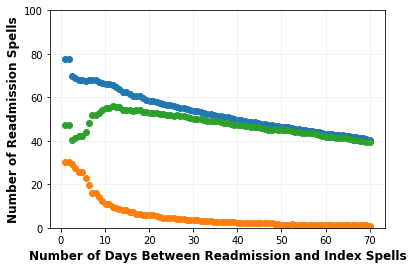

In [234]:

# Study Read_TimeDiff
df_ComplicationCodes = LookForICD10(df_CodesAsList, 'READ_diagnosis_AllEpisodes', CodeList)

# print(df_ComplicationCodes.loc[:, 'READ_TimeDiff'].describe())
# df_ComplicationCodes.loc[:, 'READ_TimeDiff'].hist();

def PropDiff_ComplicationCodes(df_ini, TimeDiff):
    df = df_ini.copy()
    
    # Keep patients with readmissions
    Filter_Read = df.loc[:, 'READ_TimeDiff'].isnull()
    df = df.loc[~Filter_Read, :]
    
    Filter_TimeDiffBelow = (df.loc[:, 'READ_TimeDiff']<=TimeDiff)
    Filter_TimeDiffAbove = (df.loc[:, 'READ_TimeDiff']>TimeDiff)
    df_TimeDiffBelow = df.loc[Filter_TimeDiffBelow, :]
    df_TimeDiffAbove = df.loc[Filter_TimeDiffAbove, :]

    def PropCodes(df_Sub):
        Filter_WithCodes = (df_Sub.loc[:,'READ_ICD10_Y83']+df_Sub.loc[:,'READ_ICD10_R04']+df_Sub.loc[:,'READ_ICD10_T81'])>=1
        N_Total = df_Sub.shape[0]
        N_WithCodes = df_Sub.loc[Filter_WithCodes, :].shape[0]
        Prop_WithCodes = 100 * N_WithCodes / N_Total

        return N_WithCodes, Prop_WithCodes

    N_WithCodes_Below, Prop_WithCodes_Below =  PropCodes(df_TimeDiffBelow)
    N_WithCodes_Above, Prop_WithCodes_Above =  PropCodes(df_TimeDiffAbove)
    Difference_Prop = Prop_WithCodes_Below - Prop_WithCodes_Above

    return Prop_WithCodes_Below, Prop_WithCodes_Above

TimeDiff = 70
PropDiff_ComplicationCodes(df_ComplicationCodes, TimeDiff)

TimeDiff_List = np.linspace(1, 70, 91)
d_Below = dict(zip(TimeDiff_List, TimeDiff_List))
d_Above = d_Below.copy()
d_Diff = d_Below.copy()

for timediff in TimeDiff_List:
    Prop_Below, Prop_Above = PropDiff_ComplicationCodes(df_ComplicationCodes, timediff)
    d_Below[timediff] = Prop_Below
    d_Above[timediff] = Prop_Above
    d_Diff[timediff] = Prop_Below - Prop_Above
    
plt.scatter(d_Below.keys(), d_Below.values())
plt.scatter(d_Above.keys(), d_Above.values())
plt.scatter(d_Diff.keys(), d_Diff.values())

plt.xlabel('Number of Days Between Readmission and Index Spells', size=12, fontweight='bold')
plt.ylabel('Number of Readmission Spells', size=12, fontweight='bold')

plt.ylim(0, 100)
plt.grid('on', alpha=0.2)

SaveFig = True
if SaveFig:
    plt.savefig(r"O:\GIRFT DiRAC\FlavienHardy\3_Readmissions\Figures\30DayREad.png",
                bbox_inches='tight', dpi=300)




In [219]:

# TEST: Logistic Regression
from sklearn.linear_model import LogisticRegression

df = df_ComplicationCodes.copy()
Filter_NoRead = df.loc[:, 'READ_TimeDiff'].isnull()
df = df.loc[~Filter_NoRead, :]

X = df.loc[:, 'READ_TimeDiff'].values()
Filter_WithCodes = (df.loc[:,'READ_ICD10_Y83']+df.loc[:,'READ_ICD10_R04']+df.loc[:,'READ_ICD10_T81'])>=1
y = np.where(Filter_WithCodes, 1, 0)

clf = LogisticRegression(random_state=0).fit(X, y)
clf.score(X, y)



Optimization terminated successfully.
         Current function value: 0.490959
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1775
Model:                          Logit   Df Residuals:                     1774
Method:                           MLE   Df Model:                            0
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.2508
Time:                        14:44:30   Log-Likelihood:                -871.45
converged:                       True   LL-Null:                       -1163.2
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0547      0.003    -17.224      0.000      -0.061      -0.048


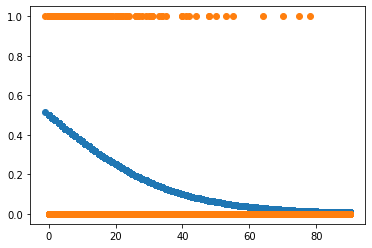

In [231]:

import statsmodels.api as sm
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

prediction = result.predict(X)
plt.scatter(X, prediction)
plt.scatter(X, y)


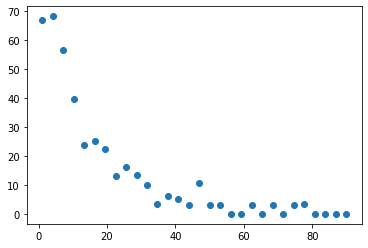

In [205]:

# Binning by days since procedure
def PropDiff_ComplicationCodes(df_ini, TimeDiff_min, TimeDiff_max):
    df = df_ini.copy()
    
    # Keep patients with readmissions
    Filter_NoRead = df.loc[:, 'READ_TimeDiff'].isnull()
    df = df.loc[~Filter_NoRead, :]
    Filter_TimeDiff = (df.loc[:, 'READ_TimeDiff']>=TimeDiff_min) & (df.loc[:, 'READ_TimeDiff']<TimeDiff_max)
    df_TimeDiff = df.loc[Filter_TimeDiff, :]

    def PropCodes(df_Sub):
        Filter_WithCodes = (df_Sub.loc[:,'READ_ICD10_Y83']+df_Sub.loc[:,'READ_ICD10_R04']+df_Sub.loc[:,'READ_ICD10_T81'])>=1
        N_Total = df_Sub.shape[0]
        N_WithCodes = df_Sub.loc[Filter_WithCodes, :].shape[0]
        Prop_WithCodes = 100 * N_WithCodes / N_Total

        return N_WithCodes, Prop_WithCodes
    
    N_WithCodes, Prop_WithCodes = PropCodes(df_TimeDiff)
    
    return N_WithCodes, Prop_WithCodes

TimeDiff_Min = np.linspace(1, 90, 30)
TimeDiff_Max = [ ndays for ndays in TimeDiff_Min[1:] ] + [TimeDiff_Min[-1]+(TimeDiff_Min[-1]-TimeDiff_Min[-2])]
d = dict(zip(TimeDiff_Min, TimeDiff_Min))
for k in range(len(TimeDiff_Min)):
#     print(TimeDiff_Min[k], TimeDiff_Max[k])
    N_WithCodes, Prop_WithCodes = PropDiff_ComplicationCodes(df_ComplicationCodes, TimeDiff_Min[k], TimeDiff_Max[k])
    d[TimeDiff_Min[k]] = Prop_WithCodes

plt.scatter(d.keys(), d.values())


count    1775.000000
mean       26.177465
std        27.135668
min        -1.000000
25%         5.000000
50%        13.000000
75%        46.000000
max        90.000000
Name: READ_TimeDiff, dtype: float64


0.02351157384008895

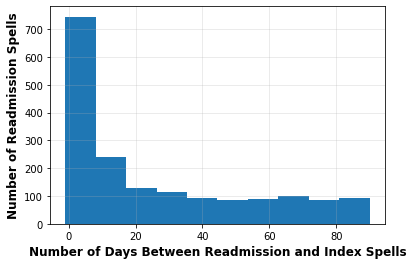

In [165]:

Filter_NoRead = df_ComplicationCodes.loc[:, 'READ_TimeDiff'].isnull()
print(df_ComplicationCodes.loc[~Filter_NoRead, 'READ_TimeDiff'].describe())

df_ComplicationCodes.loc[:, 'READ_TimeDiff'].hist();
plt.xlabel( 'Number of Days Between Readmission and Index Spells', size=12, fontweight='bold')
plt.ylabel('Number of Readmission Spells', size=12, fontweight='bold')
plt.grid('on', alpha=0.3)

SaveFig = False
if SaveFig:
    plt.savefig(r"O:\GIRFT DiRAC\FlavienHardy\3_Readmissions\Figures\TimeDiff_Read.png",
                bbox_inches='tight', dpi=300)

1163/49465

In [155]:
print('\033[1m Number of Days Between Readmission and Index Spells \033[0m')

 Number of Days Between Readmission and Index Spells 


# Looking at codes in index spells

In [241]:

# Keeping spells with <=30 day readmissions
print('Keeping <=30 day readmissions...')

print('Number of <=30 day readmissions:', df_ReadComplicationCodes.shape)
print('\n')

# Spells with no <= day readmission
Filter_No30Read = (df_CodesAsList.loc[:, 'Read30']==0)
df_NoRead = df_CodesAsList.loc[Filter_No30Read, :]
print('Number of spells WITHOUT <=30 day readmissions:', df_NoRead.shape)
print('\n')

print('-------')
print('<=30 day readmissions, ICD10 codes in INDEX spells:')
df_ICD10_Index_30Read = Readmission_CodeCount(df_ReadComplicationCodes, 'diagnosis_group_AllEpisodes')
display(df_ICD10_Index_30Read.head(10))

print('-------')
print('Spells WITHOUT <=30 day readmissions, ICD10 codes in INDEX spells:')
df_ICD10_Index_No30Read = Readmission_CodeCount(df_NoRead, 'diagnosis_group_AllEpisodes')
display(df_ICD10_Index_No30Read.head(10))


# Filter_ReadY83 = (df_ReadComplicationCodes.loc[:, 'READ_ICD10_Y83']==1)
# df_ICD10_Index = Readmission_CodeCount(df_ReadComplicationCodes.loc[Filter_ReadY83, :], 'diagnosis_group_AllEpisodes')
# display(df_ICD10_Index.head(10))



Keeping <=30 day readmissions...
Number of <=30 day readmissions: (1163, 86)


Number of spells WITHOUT <=30 day readmissions: (48302, 63)


-------
<=30 day readmissions, ICD10 codes in INDEX spells:


,Codes,Count,Description
0,J33,791,Nasal polyp
1,J32,639,Chronic sinusitis
2,J34,558,Other and unspecified disorders of nose and nasal sinuses
3,J45,313,Asthma
4,I10,284,Essential (primary) hypertension
5,Z86,188,Personal history of certain other diseases
6,J31,170,"Chronic rhinitis, nasopharyngitis and pharyngitis"
7,Z88,145,"Allergy status to drugs, medicaments and biological substances"
8,E66,99,Overweight and obesity
9,Z92,94,Personal history of medical treatment


-------
Spells WITHOUT <=30 day readmissions, ICD10 codes in INDEX spells:


,Codes,Count,Description
0,J33,35192,Nasal polyp
1,J32,25516,Chronic sinusitis
2,J34,20450,Other and unspecified disorders of nose and nasal sinuses
3,J45,13003,Asthma
4,I10,8761,Essential (primary) hypertension
5,J31,7138,"Chronic rhinitis, nasopharyngitis and pharyngitis"
6,Z86,5963,Personal history of certain other diseases
7,F17,5204,Nicotine dependence
8,Z88,4984,"Allergy status to drugs, medicaments and biological substances"
9,E66,3874,Overweight and obesity


In [243]:

df_ComplicationCodes_Index = LookForICD10(df_CodesAsList, 'diagnosis_group_AllEpisodes', CodeList)

# Keep patients with readmissions
# Filter_Read = df.loc[:, 'READ_TimeDiff'].isnull()
# df = df.loc[~Filter_Read, :]

# Study Read_TimeDiff
TimeDiff = 30
Filter_TimeDiff = df_ComplicationCodes_Index.loc[:, 'READ_TimeDiff']<=TimeDiff
df_Read =  df_ComplicationCodes_Index.loc[Filter_TimeDiff, :]  
df_NoRead = df_ComplicationCodes_Index.loc[~Filter_TimeDiff, :]  

df_Codes_Read = Readmission_CodeCount(df_Read, 'diagnosis_group_AllEpisodes')
df_Codes_NoRead = Readmission_CodeCount(df_NoRead, 'diagnosis_group_AllEpisodes')

    
# df_Merged = pd.merge(df_ICD10_Index_30Read, df_ICD10_Index_No30Read, on='Codes', how='outer')
df_Merged = pd.merge(df_Codes_Read, df_Codes_NoRead, on='Codes', how='outer')
df_Merged = df_Merged.rename(columns={'Count_x':'Count_Read',
                                      'Count_y':'Count_NoRead',
                                      'Description_x':'Description'}).drop(columns=['Description_y'])
df_Merged = df_Merged.fillna(0)
# df_Merged.loc[:, 'Prop_Read'] = 100 * df_Merged.loc[:, 'Count_Read'] / (df_Merged.loc[:, 'Count_Read'].sum())
# df_Merged.loc[:, 'Prop_NoRead'] = 100 * df_Merged.loc[:, 'Count_NoRead'] / (df_Merged.loc[:, 'Count_NoRead'].sum())
df_Merged.loc[:, 'Prop_Read'] = 100 * df_Merged.loc[:, 'Count_Read'] / (df_Read.shape[0])
df_Merged.loc[:, 'Prop_NoRead'] = 100 * df_Merged.loc[:, 'Count_NoRead'] / (df_NoRead.shape[0])

ColumnList = ['Codes', 'Prop_Read', 'Prop_NoRead', 'Description']
MinValue = 0.1
Filter_CodesUsed = (df_Merged.loc[:, 'Prop_Read']>MinValue) | (df_Merged.loc[:, 'Prop_NoRead']>MinValue)
df_Merged = df_Merged.loc[Filter_CodesUsed, ColumnList]

df_Merged.loc[:, 'Diff_Prop'] = df_Merged.loc[:, 'Prop_Read'] - df_Merged.loc[:, 'Prop_NoRead']
df_Merged.loc[:, 'LoggOdds'] = np.log(df_Merged.loc[:, 'Prop_Read']/df_Merged.loc[:, 'Prop_NoRead'])
df_Merged = df_Merged.sort_values(by=['Diff_Prop'], ascending=False)
print('Sorted by PROPORTION DIFFERENCE')
displayDataFrame(df_Merged.head(20))

# df_Merged = df_Merged.sort_values(by=['LoggOdds'], ascending=False)
# print('Sorted by LOG ODDS')
# displayDataFrame(df_Merged.head(20))

 

Looking for  Y83  in  diagnosis_group_AllEpisodes ...
Looking for  R04  in  diagnosis_group_AllEpisodes ...
Looking for  T81  in  diagnosis_group_AllEpisodes ...
Sorted by PROPORTION DIFFERENCE


C:\Users\flavien.hardy\OneDrive - NHS Improvement\Desktop\FH_Local\env\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Codes,Prop_Read,Prop_NoRead,Description,Diff_Prop,LoggOdds
4,I10,24.419604,18.137965,Essential (primary) hypertension,6.281639,0.297379
2,J34,47.979364,42.337791,Other and unspecified disorders of nose and nasal sinuses,5.641572,0.125091
11,I25,7.652623,2.917063,Chronic ischemic heart disease,4.735559,0.964471
9,Z92,8.082545,3.515382,Personal history of medical treatment,4.567163,0.832559
5,Z86,16.165090,12.345245,Personal history of certain other diseases,3.819846,0.269583
18,I48,4.385211,1.296013,Atrial fibrillation and flutter,3.089198,1.218945
16,Z95,4.557180,1.726637,Presence of cardiac and vascular implants and grafts,2.830543,0.970529
21,T81,3.697334,1.204919,"Complications of procedures, not elsewhere classified",2.492415,1.121200
13,K21,6.276870,4.055733,Gastro-esophageal reflux disease,2.221137,0.436740
7,Z88,12.467756,10.318413,"Allergy status to drugs, medicaments and biological substances",2.149342,0.189216


In [149]:

# Testing PLS
ListCodes = list(df_Merged.loc[:, 'Codes'].values)
len(ListCodes)



86

In [5]:

# Checking 30 day readmissions
# --------------------------------------------------
def Check_Read30(df_ini):
    df2 = df_ini.copy()
    
    df2.loc[:, 'TimeDiff_Read'] = (df2.loc[:, 'ReadAdmission_date'] - df2.loc[:, 'Discharge_date']).dt.days

    print('Checking that Read30=Y have <= 30 days readmission:')
    Filter_Read30 = df2.loc[:, 'Read30']=='Y'
    print('Max time difference:', df2[Filter_Read30]['TimeDiff_Read'].max(), 'days')
    return df2
# --------------------------------------------------

df2 = Check_Read30(df)
df2.head()


Checking that Read30=Y have <= 30 days readmission:
Max time difference: 30 days


,P_Spell_ID,HESID,Admission_date,Discharge_date,EPIstart,EPIend,epiorder,Epikey,POD_Derived,ProvCode,...,Readepiorder,ReadPOD,ReadProvCode,Readmain_specialty_code,ReadMain_Specialty_Description,Readsex,ReadSpell_Los,Readprocedure_group,Readdiagnosis_group,TimeDiff_Read
0,185529611,D38A9BF9DA575F95EAB69CF14914F86E,2019-12-10,2019-12-11,2019-12-10,2019-12-11,1,510252480674,EL,RHM,...,1,EM,R1F,300,General medicine,Male,7,E851~A559~U051~Y973~Y981~-1~-1~-1~-1~-1~-1~-1~...,G049~Z880~I489~J459~K509~K579~Z864~-1~-1~-1~-1...,19
1,117307877,859E926113AFFE5D83D113159B5AF649,2014-02-27,2014-02-27,2014-02-27,2014-02-27,1,501621481539,EL,RAE,...,1,EM,RAE,120,Ent,Male,2,E064~Z943~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~...,R040~Y836~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~...,6
2,1828376,02110AE75AF486FFE3EDF78D83AC98B1,2012-07-12,2012-07-13,2012-07-12,2012-07-13,1,112167769637,EL,RNQ,...,2,EM,RNQ,300,General medicine,Male,6,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,J181~J90X~D508~J459~E119~-1~-1~-1~-1~-1~-1~-1~...,7
3,91794548,687CC2DF58F013BB41CDBAA570281D81,2016-05-04,2016-05-04,2016-05-04,2016-05-04,1,505518472266,DC,RXF,...,1,EM,RR8,150,Neurosurgery,Female,10,O023~Y534~Z354~Z943~-1~-1~-1~-1~-1~-1~-1~-1~-1...,I601~F059~R458~F171~Z966~-1~-1~-1~-1~-1~-1~-1~...,57
4,220317605,FB3F994BE56771E403C811B72186EABD,2015-12-09,2015-12-09,2015-12-09,2015-12-09,1,504042157194,DC,RNA,...,1,EM,RNA,326,Acute internal medicine,Male,0,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,R042~I10X~J459~J47X~-1~-1~-1~-1~-1~-1~-1~-1~-1...,26


In [6]:


# Find all ICD-10 / OPCS codes used across all episodes of same spells
# --------------------------------------------------
def Codes_AllEpisodes(df_ini, CodeFeature_List):
    df = df_ini.copy()
    
    for CodeFeature in CodeFeature_List: # e.g. CodeFeature='diagnosis_group'
    
        # Concatenate all ICD-10/OPCS chains for episodes of same spells
        Codes_AllEpisodes = df.groupby(by='P_Spell_ID')[CodeFeature].agg('~'.join).reset_index()
        Codes_AllEpisodes.loc[:, CodeFeature] = Codes_AllEpisodes.loc[:, CodeFeature].str.split('~')

        # Keep unique codes
        Codes_AllEpisodes.loc[:, CodeFeature] = Codes_AllEpisodes.loc[:, CodeFeature].apply(set).apply(list)

        # Remove -1 from ICD-10/OPCS code chain
        for index in Codes_AllEpisodes.index:
            if '-1' in Codes_AllEpisodes.loc[index, CodeFeature]:
                Codes_AllEpisodes.loc[index, CodeFeature].remove('-1')
        
        # Reformat code chains
#         Codes_AllEpisodes.loc[:, CodeFeature] = Codes_AllEpisodes.loc[:, CodeFeature].apply('-'.join)

        # Merge on initial dataframe
        df = pd.merge(df, Codes_AllEpisodes, on='P_Spell_ID', how='left')
        df = df.rename(columns={CodeFeature+'_x':CodeFeature,
                                              CodeFeature+'_y':CodeFeature+'_AllEpisodes'})
    return df
# --------------------------------------------------

CodeFeature_List = ['diagnosis_group', 'procedure_group',
                    'Readdiagnosis_group', 'Readprocedure_group']
df3 = Codes_AllEpisodes(df2, CodeFeature_List)
df3.head()


,P_Spell_ID,HESID,Admission_date,Discharge_date,EPIstart,EPIend,epiorder,Epikey,POD_Derived,ProvCode,...,ReadMain_Specialty_Description,Readsex,ReadSpell_Los,Readprocedure_group,Readdiagnosis_group,TimeDiff_Read,diagnosis_group_AllEpisodes,procedure_group_AllEpisodes,Readdiagnosis_group_AllEpisodes,Readprocedure_group_AllEpisodes
0,185529611,D38A9BF9DA575F95EAB69CF14914F86E,2019-12-10,2019-12-11,2019-12-10,2019-12-11,1,510252480674,EL,RHM,...,General medicine,Male,7,E851~A559~U051~Y973~Y981~-1~-1~-1~-1~-1~-1~-1~...,G049~Z880~I489~J459~K509~K579~Z864~-1~-1~-1~-1...,19,"[J339, Z880, J329, J342]","[Y762, E152, E081, E133, E043, Y761, Z941, E148]","[K509, Z880, J459, I489, Z864, K579, G049]","[Y973, U051, Y981, E851, A559]"
1,117307877,859E926113AFFE5D83D113159B5AF649,2014-02-27,2014-02-27,2014-02-27,2014-02-27,1,501621481539,EL,RAE,...,Ent,Male,2,E064~Z943~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~...,R040~Y836~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~...,6,"[J320, J339, R430]","[E142, E133, Y761, Z941]","[R040, Y836]","[Z943, E064]"
2,1828376,02110AE75AF486FFE3EDF78D83AC98B1,2012-07-12,2012-07-13,2012-07-12,2012-07-13,1,112167769637,EL,RNQ,...,General medicine,Male,6,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,J181~J90X~D508~J459~E119~-1~-1~-1~-1~-1~-1~-1~...,7,"[J339, J329, E119, E780]","[E081, Y761]","[J181, J90X, D508, J459, E119]","[T124, U354, Y981, Z943, T123]"
3,91794548,687CC2DF58F013BB41CDBAA570281D81,2016-05-04,2016-05-04,2016-05-04,2016-05-04,1,505518472266,DC,RXF,...,Neurosurgery,Female,10,O023~Y534~Z354~Z943~-1~-1~-1~-1~-1~-1~-1~-1~-1...,I601~F059~R458~F171~Z966~-1~-1~-1~-1~-1~-1~-1~...,57,"[G14X, Z993, J329, F171]","[E036, E133, Y761, Z941]","[I601, R458, F059, Z966, F171]","[Z354, O023, Y534, Z943]"
4,220317605,FB3F994BE56771E403C811B72186EABD,2015-12-09,2015-12-09,2015-12-09,2015-12-09,1,504042157194,DC,RNA,...,Acute internal medicine,Male,0,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,R042~I10X~J459~J47X~-1~-1~-1~-1~-1~-1~-1~-1~-1...,26,"[I10X, J310, Z880, J459, J329, J330]","[E081, E133, Y761, Z942, Z941]","[I10X, J459, R042, J47X]",[]


# Find frequently occuring codes

In [7]:

# Keep under 30 day readmissions as unique spells (latest episodes)
# --------------------------------------------------
def Read30_UniqueSpells(df_ini):
    df = df_ini.copy()
    
    # Keep readmissions within 30 days
    Filter_Read30 = df['Read30']=='Y'
    df_Read30 = df.loc[Filter_Read30, :]

    # Drop duplicate ReadSpell_ID and keep readmission latest episode
    df_Read30 = df_Read30.sort_values(by=['Read30spellid', 'ReadEPIstart']).drop_duplicates(subset=['Read30spellid'], keep='last')
    
    return df_Read30
# --------------------------------------------------

df_Read30 = Read30_UniqueSpells(df3)
print('Number of <=30 day readmissions as unique spells :', df_Read30.shape)
df_Read30.head()


Number of <=30 day readmissions as unique spells : (2025, 66)


,P_Spell_ID,HESID,Admission_date,Discharge_date,EPIstart,EPIend,epiorder,Epikey,POD_Derived,ProvCode,...,ReadMain_Specialty_Description,Readsex,ReadSpell_Los,Readprocedure_group,Readdiagnosis_group,TimeDiff_Read,diagnosis_group_AllEpisodes,procedure_group_AllEpisodes,Readdiagnosis_group_AllEpisodes,Readprocedure_group_AllEpisodes
342,220406,003EEBC81D92296972017527B85C3C10,2017-05-05,2017-05-05,2017-05-05,2017-05-05,1,507069715452,DC,RRK,...,General medicine,Female,0,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,R51X~R05X~E871~J459~I501~N189~E119~-1~-1~-1~-1...,14,[J320],"[Y761, E134, E133]","[E871, I501, J459, R51X, R05X, N189, E119]",[]
2224,588905,00A80557FABE9E23870303EE9FF9E4FD,2012-06-27,2012-06-27,2012-06-27,2012-06-27,1,112174784744,DC,RXC,...,General medicine,Male,6,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,K220~E46X~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~...,6,"[F410, J330, J348]","[Y761, E142, Z941]","[E46X, K220]",[]
648,710333,00CB1609182CC80118FCC1D9BED5DF27,2017-01-24,2017-01-24,2017-01-24,2017-01-24,1,505523145992,DC,RJ1,...,Ent,Female,2,E062~Z942~E063~Z942~-1~-1~-1~-1~-1~-1~-1~-1~-1...,R040~Y838~E039~K210~Z866~Z880~Z888~-1~-1~-1~-1...,4,"[Z136, J348]","[E142, Y713, E152, E162, E133, Y761]","[Z866, R040, Y838, Z880, Z888, E039, K210]","[E063, E062, Z942]"
779,904661,0104E44824ED68712E7EDD211F1C9075,2017-05-17,2017-05-17,2017-05-17,2017-05-17,1,507052313141,EL,RRF,...,Ent,Male,3,E064~Z941~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~...,R040~Y838~I209~I10X~Z880~-1~-1~-1~-1~-1~-1~-1~...,1,"[I10X, J320, Z880, J338, I209, I252]","[E142, Y055, E133, Z943, E136, Y761, Z941]","[R040, I10X, Y838, Z880, I209]","[E064, Z941]"
2077,958399,01154EC1F0F1C0CE204F2017666992C7,2020-11-17,2020-11-17,2020-11-17,2020-11-17,1,700919412266,DC,RRV,...,Ear Nose and Throat,Male,1,E064~Z941~E063~Z941~E085~Z941~-1~-1~-1~-1~-1~-...,R040~Y836~Z115~I10X~E890~E780~-1~-1~-1~-1~-1~-...,8,"[I10X, J310, J329, E039, J330, J348]","[Y762, E142, Y181, E648, E081, E133, Y761, Z941]","[R040, I10X, E890, Y836, E780, Z115]","[E085, E064, E063, Z941]"


In [8]:


# Find frequency of each code for <=30 day readmissions 
# --------------------------------------------------
def Readmission_CodeCount(df_ini, CodeFeature_Name):
    df = df_ini.copy()
    
    Series_Codes = pd.Series( [item for sublist in df.loc[:, CodeFeature_Name] for item in sublist] )
    Series_Codes = Series_Codes.value_counts()
    
    Description = []
    if 'diagnosis_group' in CodeFeature_Name:
        for code in Series_Codes.index:
            if icd10.exists(code[0:3]):
                Description.append( icd10.find(code[0:3]).description )
            else:
                Description.append(' ')

        df_Codes = pd.DataFrame({'Codes':Series_Codes.index,
                                 'Count':Series_Codes.values,
                                 'Description':Description})
    else:
        df_Codes = pd.DataFrame({'Codes':Series_Codes.index,
                                 'Count':Series_Codes.values})
        
    return df_Codes
# --------------------------------------------------

# Changing pd display options temporarily to read ICD10 code descriptions
# pd.options.display.max_colwidth = 50
pd.options.display.max_colwidth = None

print('Number of <=30 day readmissions:', df_Read30.shape)
print('\n')

print('-------')
print('<=30 day readmissions, ICD10 codes:')
df_ICD10_Read = Readmission_CodeCount(df_Read30, 'Readdiagnosis_group_AllEpisodes')
display(df_ICD10_Read.head(10))

# print('-------')
# print('Admissions prior to <=30 day readmissions, ICD10 codes:')
# df_ICD10 = Readmission_CodeCount(df_Read30, 'diagnosis_group_AllEpisodes')
# display(df_ICD10.head(10))

# print('\n')

# print('-------')
# print('<=30 day readmissions, OPCS codes:')
# df_OPCS_Read = Readmission_CodeCount(df_Read30, 'Readprocedure_group_AllEpisodes')
# display(df_OPCS_Read.head())

# print('-------')
# print('Admissions prior to <=30 day readmissions, OPCS codes:')
# df_OPCS = Readmission_CodeCount(df_Read30, 'procedure_group_AllEpisodes')
# display(df_OPCS.head())

# Revert back to default pd display options
pd.options.display.max_colwidth = 50
# pd.options.display.max_colwidth = None

# Saving Files
SaveCSV = True
if SaveCSV:
    df_ICD10_Read.to_csv(r'O:\GIRFT DiRAC\FlavienHardy\3_Readmissions\Data\1.Processed\Read_Sinus_AllEpisodes_ICD10Count.csv')


Number of <=30 day readmissions: (2025, 66)


-------
<=30 day readmissions, ICD10 codes:


,Codes,Count,Description
0,R040,481,Hemorrhage from respiratory passages
1,J459,472,Asthma
2,I10X,461,Essential (primary) hypertension
3,Y838,370,"Surgical operation and other surgical procedures as the cause of abnormal reaction of the patient, or of later complication, without mention of misadventure at the time of the procedure"
4,T810,305,"Complications of procedures, not elsewhere classified"
5,Z870,295,Personal history of other diseases and conditions
6,Y836,191,"Surgical operation and other surgical procedures as the cause of abnormal reaction of the patient, or of later complication, without mention of misadventure at the time of the procedure"
7,Z864,182,Personal history of certain other diseases
8,J329,151,Chronic sinusitis
9,E119,145,Type 2 diabetes mellitus


## Find complication codes

In [18]:

# Test for the presence of complication codes
# --------------------------------------------------
def FindComplicationCodes(df_ini, ComplicationCodes_List, FeatureName):
    df = df_ini.copy()
    
    ComplicationCodes = '|'.join(ComplicationCodes_List)
    Filter_ComplicationCodes = df.loc[:, FeatureName].apply('-'.join).str.contains(ComplicationCodes)
    df.loc[:, 'ReadICD10_ComplicationCodes'] = np.where(Filter_ComplicationCodes, 1, 0)
    
    return df
# --------------------------------------------------

ComplicationCodes_List = ['Y83', 'Y84', 'T83', 'T84']
FeatureName = 'Readdiagnosis_group_AllEpisodes'
df_Read30 = FindComplicationCodes(df_Read30, ComplicationCodes_List, FeatureName)
df_Read30.head()

# Count complication codes per patient within regular time intervals
TimeDiff_Min = df_Read30['TimeDiff_Read'].min()
TimeDiff_Max = df_Read30['TimeDiff_Read'].max()
Interval = 2 # days
N = np.floor( (TimeDiff_Max - TimeDiff_Min) / Interval ) .astype('int')
Sum_List = []
Count_List = []
TimeDiffBin_List = []
for k in range(1,N+1):
    Lower_TimeDiff = k*Interval
    Upper_TimeDiff = Lower_TimeDiff+Interval
    Filter_Interval = (df_Read30['TimeDiff_Read']>Lower_TimeDiff) & (df_Read30['TimeDiff_Read']<=Upper_TimeDiff)
    df_Sub = df_Read30.loc[Filter_Interval, :]
    
    Sum = df_Sub['ReadICD10_ComplicationCodes'].sum()
    Count = df_Sub['ReadICD10_ComplicationCodes'].count()
    Sum_List.append(Sum)
    Count_List.append(Count)
    
    TimeDiffBin_List.append(k*Interval)
    
df_TimeDiff_Bins = pd.DataFrame( data = {'TimeDiffBin':TimeDiffBin_List,
                                         'ComplicationCodes_Sum':Sum_List,
                                         'Patients_Count':Count_List} )
df_TimeDiff_Bins.loc[:, 'Prop'] = 100 * (df_TimeDiff_Bins.loc[:, 'ComplicationCodes_Sum'] / df_TimeDiff_Bins.loc[:, 'Patients_Count'])

df_TimeDiff_Bins.head()


,TimeDiffBin,ComplicationCodes_Sum,Patients_Count,Prop
0,2,96,250,38.400000
1,4,123,313,39.297125
2,6,82,234,35.042735
3,8,36,121,29.752066
4,10,26,103,25.242718


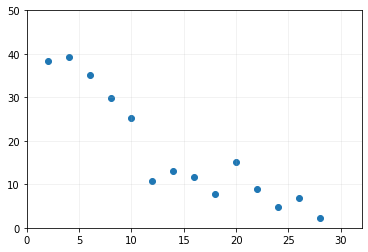

In [19]:

X = df_TimeDiff_Bins['TimeDiffBin']
Y = df_TimeDiff_Bins['Prop']
plt.scatter(X, Y)
plt.ylim(0,50)
plt.xlim(0,32)
plt.grid('on', alpha=0.2)
